# Problem statement

1.Extract reviews of any product from ecommerce website like amazon

2.Perform emotion mining

In [1]:
# Importing requests to extract content from a url
import requests
# Beautifulsoup is for web scrapping...used to scrap specific content
from bs4 import BeautifulSoup as bs  
import re 
iphone_reviews= []

In [2]:
iphone_snapdeal=[]
url1= "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2= "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
    ip= []  
    base_url= url1+str(i)+url2
    response= requests.get(base_url)
    soup= bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
    temp= soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
    for j in range(len(temp)):
        ip.append(temp[j].find("p").text)
        iphone_snapdeal= iphone_snapdeal+ip

In [3]:
# Removing repeated reviews 
iphone_snapdeal = list(set(iphone_snapdeal))

In [4]:
# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [5]:
iphone_snapdeal

["It's cool phone, good processing with latest iOS. The cons are: Low memory space. There is total 8 gb space, and almost 6 gb are already filled u \xa0read more  ",
 'I am really happy with product',
 'I am very much happy with my product thanks to SNEPDEAL.',
 "The OS will take around 5GB, leaving only 3 GB for your files. Unless you're not a heavy files user.",
 'Features are good....but the phone gets heated after some time',
 'Awesome iphone in this price range.\ni would recommend this phone',
 'iphone really nice cell',
 'Good product. Worth buying. Nice phone. Timely delivery by snap deal',
 'Mobile was got no hang smooth  touch  performing well',
 'I got my iPhone 5c white colour in good condition and best rate \nsnapdeal rate is always lowest then other sites and store also',
 'Marvallous Phone...Ever used....You must buy',
 'Worth in this price. Excellent features. Overall performance is Good',
 'Recently purchase the phone and was a bit doubtfull while purchasing, but i must

# Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.tokenize import TweetTokenizer
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Importing Data

In [7]:
ip_snapd= pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,"[""It's cool phone",good processing with latest iOS. The cons are: Low memory space. There is total 8 gb space,"and almost 6 gb are already filled u \xa0read more """,'I am really happy with product','I am very much happy with my product thanks to SNEPDEAL.',"""The OS will take around 5GB","leaving only 3 GB for your files. Unless you're not a heavy files user.""",'Features are good....but the phone gets heated after some time','Awesome iphone in this price range.\ni would recommend this phone','iphone really nice cell',...,'Good product and packing was also good only issue with courier service..they took more then 10 days to deliver .','Good phone','Good Price. Great Seller. Genuine Product. Fast Shipping. Recommended*****','Very good product and delivered in time as committed; true value for money','Price and delivery service are good I received my order on time','Good budgeted iphone. Should only go for it if want to have an iphone experience but within your budget.','Have switched from android to apple and i am pretty satisfied with iPhone 5c . Excellent camera,crisp display . The battery issue has been solved with the latest ios9 update .','Satisfied and will buy more products from Snapdeal',"""I'm also happy with Snapdeal service""]"


In [8]:
ip_snapd= ' '.join(ip_snapd)
ip_snapd

'["It\'s cool phone  good processing with latest iOS. The cons are: Low memory space. There is total 8 gb space  and almost 6 gb are already filled u \\xa0read more  "  \'I am really happy with product\'  \'I am very much happy with my product thanks to SNEPDEAL.\'  "The OS will take around 5GB  leaving only 3 GB for your files. Unless you\'re not a heavy files user."  \'Features are good....but the phone gets heated after some time\'  \'Awesome iphone in this price range.\\ni would recommend this phone\'  \'iphone really nice cell\'  \'Good product. Worth buying. Nice phone. Timely delivery by snap deal\'  \'Mobile was got no hang smooth  touch  performing well\'  \'I got my iPhone 5c white colour in good condition and best rate \\nsnapdeal rate is always lowest then other sites and store also\'  \'Marvallous Phone...Ever used....You must buy\'  \'Worth in this price. Excellent features. Overall performance is Good\'  \'Recently purchase the phone and was a bit doubtfull while purchas

In [9]:
# Remove Punctuations 
no_punc_text= ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Its cool phone  good processing with latest iOS The cons are Low memory space There is total 8 gb space  and almost 6 gb are already filled u xa0read more    I am really happy with product  I am very much happy with my product thanks to SNEPDEAL  The OS will take around 5GB  leaving only 3 GB for your files Unless youre not a heavy files user  Features are goodbut the phone gets heated after some time  Awesome iphone in this price rangeni would recommend this phone  iphone really nice cell  Good product Worth buying Nice phone Timely delivery by snap deal  Mobile was got no hang smooth  touch  performing well  I got my iPhone 5c white colour in good condition and best rate nsnapdeal rate is always lowest then other sites and store also  Marvallous PhoneEver usedYou must buy  Worth in this price Excellent features Overall performance is Good  Recently purchase the phone and was a bit doubtfull while purchasing  but i must tell you this is the most best iphone you can get at this price 

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\ubed
[nltk_data]     shaikh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# remove https or url within text
no_url_text= re.sub(r'http\S+', '', no_punc_text)
no_url_text

'Its cool phone  good processing with latest iOS The cons are Low memory space There is total 8 gb space  and almost 6 gb are already filled u xa0read more    I am really happy with product  I am very much happy with my product thanks to SNEPDEAL  The OS will take around 5GB  leaving only 3 GB for your files Unless youre not a heavy files user  Features are goodbut the phone gets heated after some time  Awesome iphone in this price rangeni would recommend this phone  iphone really nice cell  Good product Worth buying Nice phone Timely delivery by snap deal  Mobile was got no hang smooth  touch  performing well  I got my iPhone 5c white colour in good condition and best rate nsnapdeal rate is always lowest then other sites and store also  Marvallous PhoneEver usedYou must buy  Worth in this price Excellent features Overall performance is Good  Recently purchase the phone and was a bit doubtfull while purchasing  but i must tell you this is the most best iphone you can get at this price 

In [12]:
text_tokens= word_tokenize(no_url_text)
print(text_tokens)

['Its', 'cool', 'phone', 'good', 'processing', 'with', 'latest', 'iOS', 'The', 'cons', 'are', 'Low', 'memory', 'space', 'There', 'is', 'total', '8', 'gb', 'space', 'and', 'almost', '6', 'gb', 'are', 'already', 'filled', 'u', 'xa0read', 'more', 'I', 'am', 'really', 'happy', 'with', 'product', 'I', 'am', 'very', 'much', 'happy', 'with', 'my', 'product', 'thanks', 'to', 'SNEPDEAL', 'The', 'OS', 'will', 'take', 'around', '5GB', 'leaving', 'only', '3', 'GB', 'for', 'your', 'files', 'Unless', 'youre', 'not', 'a', 'heavy', 'files', 'user', 'Features', 'are', 'goodbut', 'the', 'phone', 'gets', 'heated', 'after', 'some', 'time', 'Awesome', 'iphone', 'in', 'this', 'price', 'rangeni', 'would', 'recommend', 'this', 'phone', 'iphone', 'really', 'nice', 'cell', 'Good', 'product', 'Worth', 'buying', 'Nice', 'phone', 'Timely', 'delivery', 'by', 'snap', 'deal', 'Mobile', 'was', 'got', 'no', 'hang', 'smooth', 'touch', 'performing', 'well', 'I', 'got', 'my', 'iPhone', '5c', 'white', 'colour', 'in', 'good

In [13]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\ubed
[nltk_data]     shaikh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\ubed
[nltk_data]     shaikh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Tokens count
len(text_tokens)

1573

In [15]:
# Remove Stopwords
my_stop_words= stopwords.words('english')

sw_list= ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens= [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Its', 'cool', 'phone', 'good', 'processing', 'latest', 'iOS', 'The', 'cons', 'Low', 'memory', 'space', 'There', 'total', '8', 'gb', 'space', 'almost', '6', 'gb', 'already', 'filled', 'u', 'xa0read', 'really', 'happy', 'product', 'much', 'happy', 'product', 'thanks', 'SNEPDEAL', 'The', 'OS', 'take', 'around', '5GB', 'leaving', '3', 'GB', 'files', 'Unless', 'youre', 'heavy', 'files', 'user', 'Features', 'goodbut', 'phone', 'gets', 'heated', 'time', 'Awesome', 'iphone', 'price', 'rangeni', 'would', 'recommend', 'phone', 'iphone', 'really', 'nice', 'cell', 'Good', 'product', 'Worth', 'buying', 'Nice', 'phone', 'Timely', 'delivery', 'snap', 'deal', 'Mobile', 'got', 'hang', 'smooth', 'touch', 'performing', 'well', 'got', 'iPhone', '5c', 'white', 'colour', 'good', 'condition', 'best', 'rate', 'nsnapdeal', 'rate', 'always', 'lowest', 'sites', 'store', 'also', 'Marvallous', 'PhoneEver', 'usedYou', 'must', 'buy', 'Worth', 'price', 'Excellent', 'features', 'Overall', 'performance', 'Good', 'Rec

In [16]:
# Normalize the data
lower_words= [Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['buy', 'worth', 'price', 'excellent', 'features', 'overall', 'performance', 'good', 'recently', 'purchase', 'phone', 'bit', 'doubtfull', 'purchasing', 'must', 'tell', 'best', 'iphone', 'get', 'price', 'it', 'packed', 'beatifully', 'seller', 'day', 'dispatchnprosn1', 'very', 'cheap', 'prizen2', 'ios', '9', 'upgraden3', 'very', 'smoothn4', 'good', 'build', 'qualitynnconsn1plastic', 'bodyn2', '8gb', 'memorynnbut', 'even', 'plastic', 'body', 'looks', 'attractive', 'premium', 'good', 'plastuc', 'used', 'everyone', 'go', 'phone', 'budget', '20k', 'a', 'mush', 'deal', 'good', 'phone', 'mobile', 'oparating', 'essy', 'inter', 'net', 'fast', 'working', 'very', 'good', 'service', 'seller', 'faster', 'delivery', 'proper', 'packing', 'very', 'good', 'one', 'perfectly', 'original', 'one', 'original', 'accessories', 'goood', 'fast', 'shipping', 'bought', 'iphone', '5c', 'snapdeal', 'product', 'absolutly', 'real', 'wors', 'properly', 'price', 'also', 'low', 'online', 'shoping', 'sides']


In [17]:
# Stemming (Optional)
ps= PorterStemmer()
stemmed_tokens= [ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['buy', 'worth', 'price', 'excel', 'featur', 'overal', 'perform', 'good', 'recent', 'purchas', 'phone', 'bit', 'doubtful', 'purchas', 'must', 'tell', 'best', 'iphon', 'get', 'price', 'it', 'pack', 'beati', 'seller', 'day', 'dispatchnprosn1', 'veri', 'cheap', 'prizen2', 'io', '9', 'upgraden3', 'veri', 'smoothn4', 'good', 'build', 'qualitynnconsn1plast', 'bodyn2', '8gb', 'memorynnbut', 'even', 'plastic', 'bodi', 'look', 'attract', 'premium', 'good', 'plastuc', 'use', 'everyon', 'go', 'phone', 'budget', '20k', 'a', 'mush', 'deal', 'good', 'phone', 'mobil', 'opar', 'essi', 'inter', 'net', 'fast', 'work', 'veri', 'good', 'servic', 'seller', 'faster', 'deliveri', 'proper', 'pack', 'veri', 'good', 'one', 'perfectli', 'origin', 'one', 'origin', 'accessori', 'goood', 'fast', 'ship', 'bought', 'iphon', '5c', 'snapdeal', 'product', 'absolutli', 'real', 'wor', 'properli', 'price', 'also', 'low', 'onlin', 'shope', 'side']


In [23]:
import spacy  
!python -m spacy download en_core_web_sm   
from spacy import displacy  
  
nlp = spacy.load("en_core_web_sm")  
# Process whole documents  
text = ("When Sebastian Thrun started working on self-driving cars at "  
        "Google in 2007, few people outside of the company took him "  
        "seriously. “I can tell you very senior CEOs of major American "  
        "car companies would shake my hand and turn away because I wasn’t "  
        "worth talking to,” said Thrun, in an interview with Recode earlier "  
        "this week.")  
doc = nlp(text)  

     -------------------------------------- 12.8/12.8 MB 928.1 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [24]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp= spacy.load('en_core_web_sm')
doc= nlp(' '.join(lower_words))
print(doc)

its cool phone good processing latest ios the cons low memory space there total 8 gb space almost 6 gb already filled u xa0read really happy product much happy product thanks snepdeal the os take around 5gb leaving 3 gb files unless youre heavy files user features goodbut phone gets heated time awesome iphone price rangeni would recommend phone iphone really nice cell good product worth buying nice phone timely delivery snap deal mobile got hang smooth touch performing well got iphone 5c white colour good condition best rate nsnapdeal rate always lowest sites store also marvallous phoneever usedyou must buy worth price excellent features overall performance good recently purchase phone bit doubtfull purchasing must tell best iphone get price it packed beatifully seller day dispatchnprosn1 very cheap prizen2 ios 9 upgraden3 very smoothn4 good build qualitynnconsn1plastic bodyn2 8gb memorynnbut even plastic body looks attractive premium good plastuc used everyone go phone budget 20k a mu

In [25]:
lemmas= [token.lemma_ for token in doc]
print(lemmas)

['its', 'cool', 'phone', 'good', 'processing', 'late', 'io', 'the', 'con', 'low', 'memory', 'space', 'there', 'total', '8', 'gb', 'space', 'almost', '6', 'gb', 'already', 'fill', 'u', 'xa0read', 'really', 'happy', 'product', 'much', 'happy', 'product', 'thank', 'snepdeal', 'the', 'os', 'take', 'around', '5', 'gb', 'leave', '3', 'gb', 'file', 'unless', 'you', 're', 'heavy', 'file', 'user', 'feature', 'goodbut', 'phone', 'get', 'heated', 'time', 'awesome', 'iphone', 'price', 'rangeni', 'would', 'recommend', 'phone', 'iphone', 'really', 'nice', 'cell', 'good', 'product', 'worth', 'buy', 'nice', 'phone', 'timely', 'delivery', 'snap', 'deal', 'mobile', 'get', 'hang', 'smooth', 'touch', 'perform', 'well', 'get', 'iphone', '5c', 'white', 'colour', 'good', 'condition', 'good', 'rate', 'nsnapdeal', 'rate', 'always', 'low', 'site', 'store', 'also', 'marvallous', 'phoneever', 'usedyou', 'must', 'buy', 'worth', 'price', 'excellent', 'feature', 'overall', 'performance', 'good', 'recently', 'purchas

In [26]:
clean_comments= ' '.join(lemmas)
clean_comments

'its cool phone good processing late io the con low memory space there total 8 gb space almost 6 gb already fill u xa0read really happy product much happy product thank snepdeal the os take around 5 gb leave 3 gb file unless you re heavy file user feature goodbut phone get heated time awesome iphone price rangeni would recommend phone iphone really nice cell good product worth buy nice phone timely delivery snap deal mobile get hang smooth touch perform well get iphone 5c white colour good condition good rate nsnapdeal rate always low site store also marvallous phoneever usedyou must buy worth price excellent feature overall performance good recently purchase phone bit doubtfull purchasing must tell good iphone get price it pack beatifully seller day dispatchnprosn1 very cheap prizen2 io 9 upgraden3 very smoothn4 good build qualitynnconsn1plastic bodyn2 8 gb memorynnbut even plastic body look attractive premium good plastuc use everyone go phone budget 20k a mush deal good phone mobile

In [27]:
# feature extraction
cv= CountVectorizer()
clean_commentscv= cv.fit_transform(lemmas)

In [28]:
print(cv.vocabulary_)

{'its': 179, 'cool': 77, 'phone': 244, 'good': 143, 'processing': 262, 'late': 184, 'io': 169, 'the': 356, 'con': 72, 'low': 194, 'memory': 202, 'space': 338, 'there': 357, 'total': 372, 'gb': 138, 'almost': 19, 'already': 20, 'fill': 128, 'xa0read': 407, 'really': 285, 'happy': 151, 'product': 263, 'much': 209, 'thank': 353, 'snepdeal': 334, 'os': 233, 'take': 350, 'around': 29, 'leave': 185, 'file': 127, 'unless': 380, 'you': 409, 're': 283, 'heavy': 157, 'user': 387, 'feature': 125, 'goodbut': 144, 'get': 140, 'heated': 156, 'time': 367, 'awesome': 33, 'iphone': 172, 'price': 255, 'rangeni': 281, 'would': 406, 'recommend': 290, 'nice': 220, 'cell': 60, 'worth': 405, 'buy': 54, 'timely': 368, 'delivery': 96, 'snap': 331, 'deal': 91, 'mobile': 205, 'hang': 150, 'smooth': 329, 'touch': 374, 'perform': 242, 'well': 394, '5c': 7, 'white': 396, 'colour': 67, 'condition': 73, 'rate': 282, 'nsnapdeal': 223, 'always': 22, 'site': 326, 'store': 343, 'also': 21, 'marvallous': 198, 'phoneever':

In [29]:
print(cv.get_feature_names()[100:200])

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [33]:
print(clean_commentscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
print(clean_commentscv.toarray().shape)

(1028, 410)


# n-gram

In [35]:
cv_ngram_range= CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram= cv_ngram_range.fit_transform(lemmas)

In [36]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [37]:
# tfidf vectorizer
tfidfv_ngram_max_features= TfidfVectorizer(norm= 'l2',analyzer= 'word',ngram_range= (1,3),max_features= 500)
tfidf_matix_ngram= tfidfv_ngram_max_features.fit_transform(lemmas)

# Generate Wordcloud

In [38]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

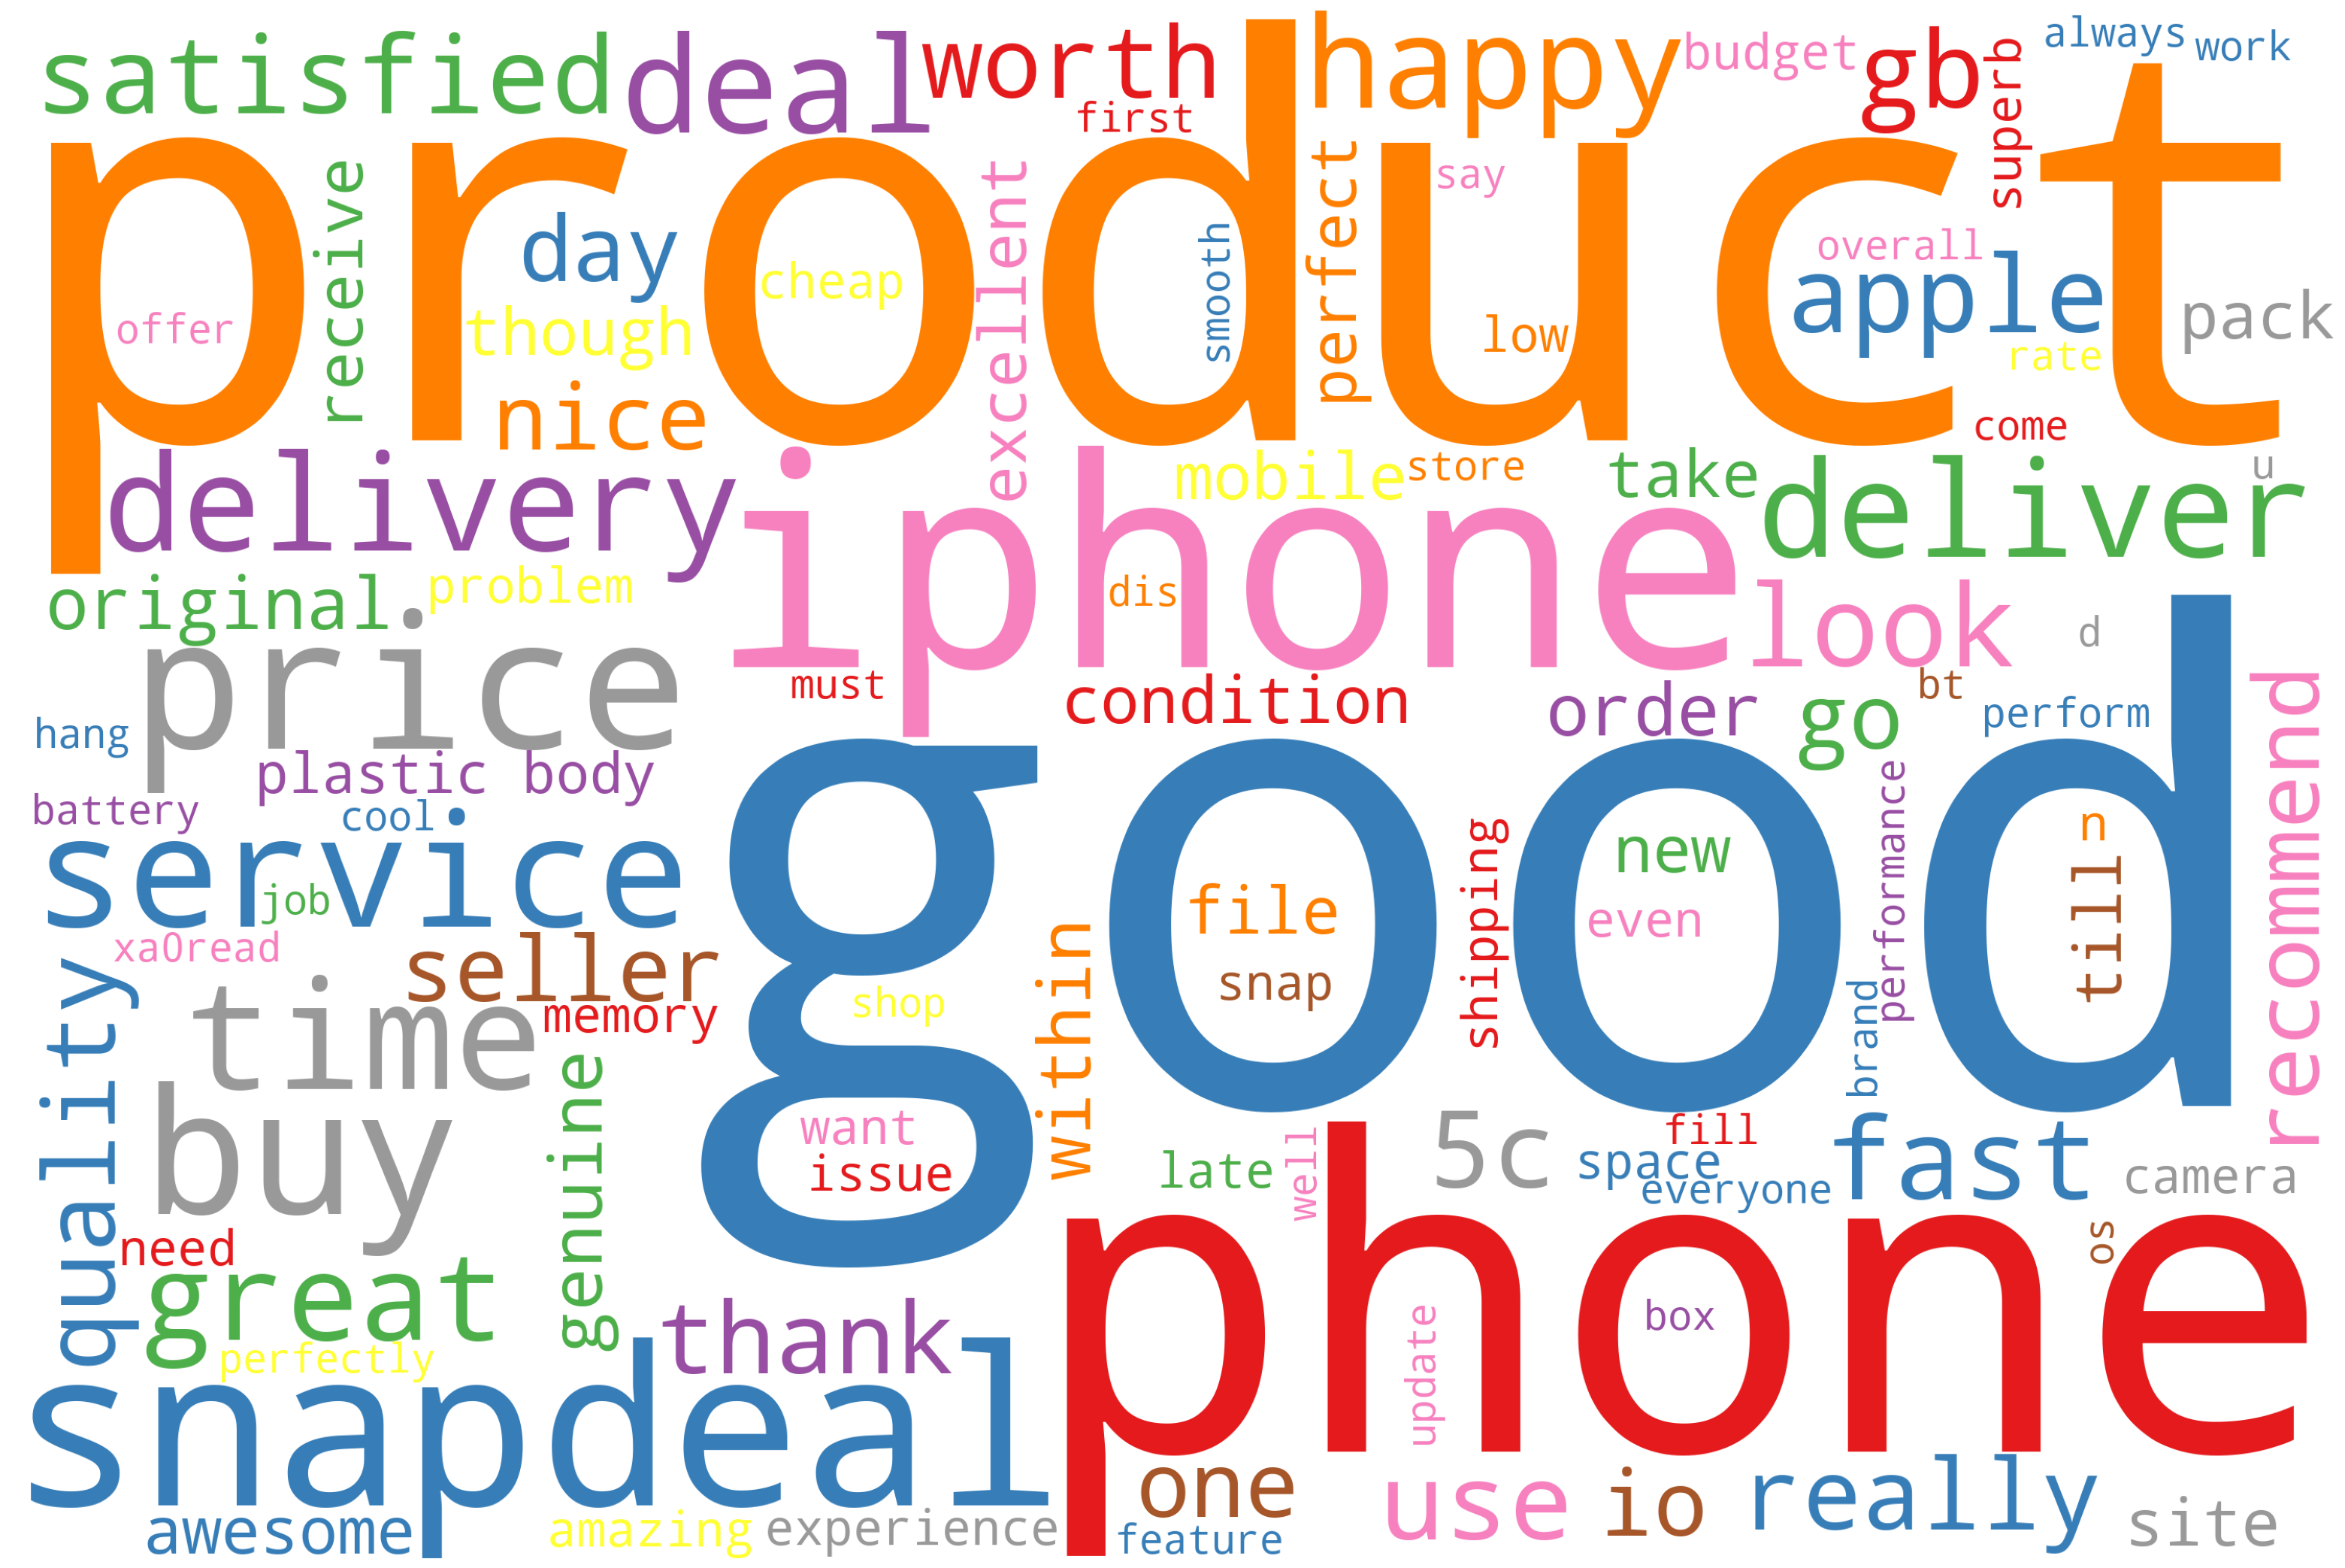

In [39]:
# Generate wordcloud
stopwords= STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')
wordcloud= WordCloud(width= 3000, height= 2000, background_color= 'white', max_words= 100,colormap= 'Set1',stopwords=stopwords).generate(clean_comments)
# Plot
plot_cloud(wordcloud)

# Name Entity Recognition

In [40]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')
one_block= clean_comments
doc_block= nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [41]:
for token in doc_block[100:200]:
    print(token,token.pos_)

usedyou PRON
must AUX
buy VERB
worth ADJ
price NOUN
excellent ADJ
feature NOUN
overall ADJ
performance NOUN
good ADJ
recently ADV
purchase NOUN
phone NOUN
bit NOUN
doubtfull ADJ
purchasing NOUN
must AUX
tell VERB
good ADJ
iphone NOUN
get VERB
price NOUN
it PRON
pack VERB
beatifully ADV
seller NOUN
day NOUN
dispatchnprosn1 NOUN
very ADV
cheap ADJ
prizen2 ADV
io VERB
9 NUM
upgraden3 ADJ
very ADV
smoothn4 ADJ
good ADJ
build NOUN
qualitynnconsn1plastic PROPN
bodyn2 NOUN
8 NUM
gb NOUN
memorynnbut ADJ
even ADV
plastic ADJ
body NOUN
look VERB
attractive ADJ
premium NOUN
good ADJ
plastuc NOUN
use VERB
everyone PRON
go VERB
phone NOUN
budget NOUN
20k NOUN
a DET
mush NOUN
deal VERB
good ADJ
phone NOUN
mobile NOUN
oparating NOUN
essy PROPN
inter PROPN
net ADJ
fast ADJ
work NOUN
very ADV
good ADJ
service NOUN
seller NOUN
fast ADJ
delivery NOUN
proper ADJ
packing NOUN
very ADV
good ADJ
one NUM
perfectly ADV
original ADJ
one NUM
original ADJ
accessory NOUN
goood NOUN
fast ADJ
shipping NOUN
buy VERB


In [42]:
# Filtering the nouns and verbs only
nouns_verbs= [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['side', 'phone', 'class', 'service', 'ð\x9f\x98\x98', 'product', 'get', 'product', 'price', 'delivery', 'iphone', 'buy', 'price', 'sale', 'buy', 'deal', 'price', 'servicenthank', 'sd', 'phone', 'price', 'buy', 'product', 'product', 'product', 'priceat', 'buy', 'apple', 'product', 'deal', 'make', 'n', 'order', 'finger', 'promptness', 'delivery', 'product', 'receive', 'satisfy', 'product', 'brand', 'iphone', 'get', 'hour', 'order', 'pack', 'superb', 'priority', 'phone', 'apple', 'camera', 'phone', 'work', 'shot', 'order', 'sister', 'gift', 'week', 'come', 'thatnand', 'thank', 'offer', 'recharge', 'sitenngreat', 'job', 'team', 'product', 'recommend', 'friend', 'family', 'member', 'buy', 'deal', 'product', 'update', 'ios', 'd', 'phone', 'good', 'd', 'phone', 'look', 'plastic', 'body', 'metal', 'body', 'look', 'mean', 'body', 'look', 'plastic', 'look', 'camera', 'superb', 'battery', 'dere', 'problem', 'space', 'say', 'phone']


In [43]:
# Counting the noun & verb tokens
cv= CountVectorizer()

X= cv.fit_transform(nouns_verbs)
sum_words= X.sum(axis=0)

words_freq= [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq= sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df= pd.DataFrame(words_freq)
wd_df.columns= ['word','count']
# viewing top ten results
wd_df[0:10]

,word,count
0,product,40
1,phone,28
2,iphone,26
3,price,17
4,buy,15
5,service,12
6,time,11
7,delivery,11
8,deliver,11
9,deal,10


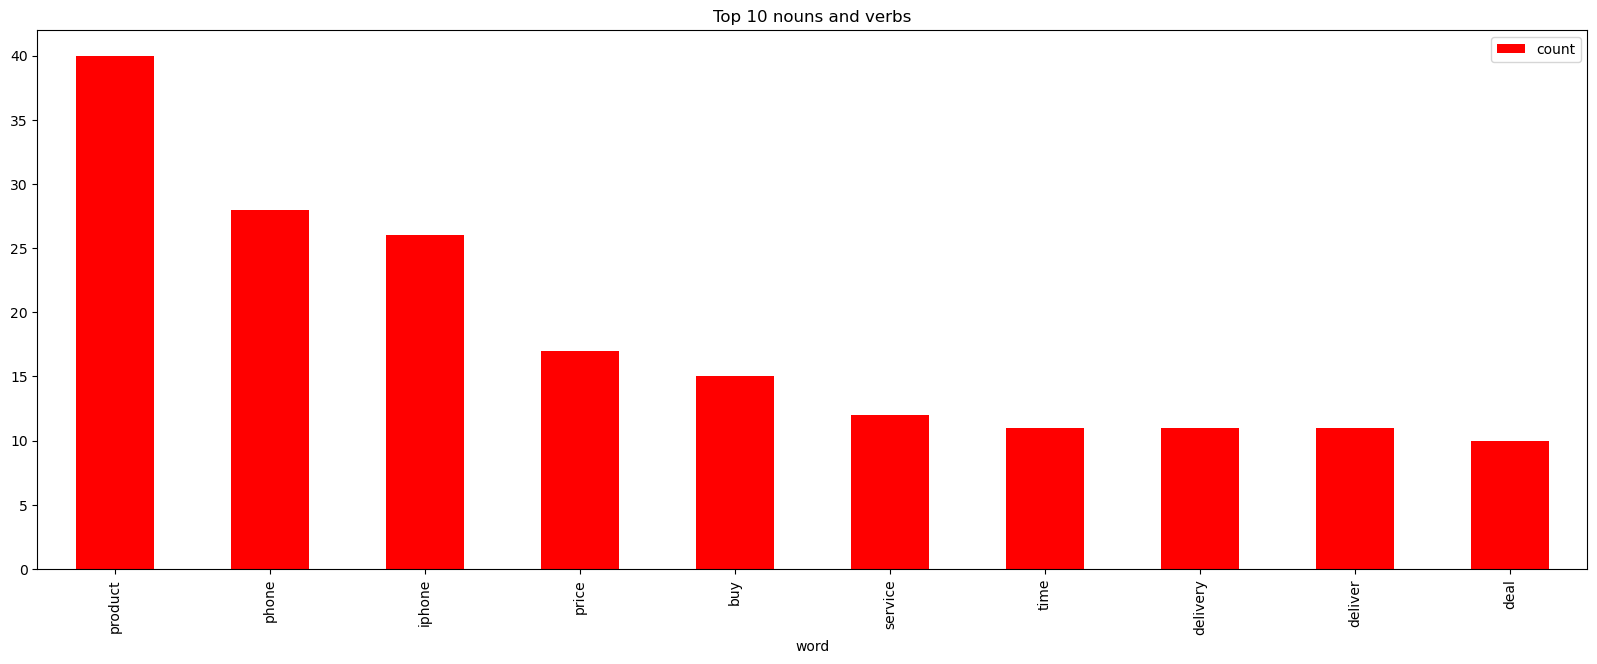

In [44]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word', figsize=(20,7), title='Top 10 nouns and verbs',color='red');

# Emotion Mining Analysis

In [45]:
from nltk import tokenize
sentences= tokenize.sent_tokenize(' '.join(iphone_snapdeal))
sentences

["It's cool phone, good processing with latest iOS.",
 'The cons are: Low memory space.',
 'There is total 8 gb space, and almost 6 gb are already filled u \xa0read more   I am really happy with product I am very much happy with my product thanks to SNEPDEAL.',
 'The OS will take around 5GB, leaving only 3 GB for your files.',
 "Unless you're not a heavy files user.",
 'Features are good....but the phone gets heated after some time Awesome iphone in this price range.',
 'i would recommend this phone iphone really nice cell Good product.',
 'Worth buying.',
 'Nice phone.',
 'Timely delivery by snap deal Mobile was got no hang smooth  touch  performing well I got my iPhone 5c white colour in good condition and best rate \nsnapdeal rate is always lowest then other sites and store also Marvallous Phone...Ever used....You must buy Worth in this price.',
 'Excellent features.',
 'Overall performance is Good Recently purchase the phone and was a bit doubtfull while purchasing, but i must tell

In [46]:
sent_df= pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,"It's cool phone, good processing with latest iOS."
1,The cons are: Low memory space.
2,"There is total 8 gb space, and almost 6 gb are..."
3,"The OS will take around 5GB, leaving only 3 GB..."
4,Unless you're not a heavy files user.
...,...
122,Should only go for it if want to have an iphon...
123,Have switched from android to apple and i am p...
124,"Excellent camera , crisp display ."
125,The battery issue has been solved with the la...


In [48]:
# Emotion Lexicon - Affin
affin=pd.read_csv("C:\\Users\\ubed shaikh\\OneDrive\\Desktop\\Data Science\\afinn.csv",sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [49]:
affinity_scores= affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [50]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp= spacy.load('en_core_web_sm')
sentiment_lexicon= affinity_scores

def calculate_sentiment(text:str=None):
    sent_score= 0
    if text:
        sentence= nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [51]:
# manual testing
calculate_sentiment(text= 'great')

3

In [52]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']= sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      4
1      0
2      8
3     -1
4      0
      ..
122    1
123    3
124    3
125    1
126    5
Name: sentiment_value, Length: 127, dtype: int64

In [53]:
# how many words are there in a sentence?
sent_df['word_count']= sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       8
1       6
2      33
3      13
4       7
       ..
122    16
123    15
124     6
125    12
126    14
Name: word_count, Length: 127, dtype: int64

In [54]:
sent_df.sort_values(by= 'sentiment_value')

,sentence,sentiment_value,word_count
84,But those all reviews are fake and just to dam...,-6,14
78,Dont buy on fraudulent schemes.,-4,5
48,Dere is only one problem nd dat is space... Bt...,-4,20
61,no lagging till today\nsuitable for your busin...,-3,9
112,Only problem is you need to pay for everything.,-3,9
...,...,...,...
92,"good as like iphone, apple , and snapdeal ser...",11,18
97,But after receiving this phone I am really ver...,13,72
54,i would recommended Snapdeal service my near &...,16,47
71,"Pros: Sleek phone, looks sexy, no lags, really...",18,51


In [55]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    127.000000
mean       2.818898
std        4.183143
min       -6.000000
25%        0.000000
50%        2.000000
75%        4.000000
max       23.000000
Name: sentiment_value, dtype: float64

In [56]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,The cons are: Low memory space.,0,6
3,"The OS will take around 5GB, leaving only 3 GB...",-1,13
4,Unless you're not a heavy files user.,0,7
12,It was packed beatifully by the seller and sam...,0,11
13,Pros\n1.,0,2
14,Very Cheap prize\n2.,0,4
15,IOS 9 upgrade.,0,3
16,3.,0,1
17,Very smooth\n4.,0,3
21,Faster delivery and proper packing.,0,5


In [57]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,"It's cool phone, good processing with latest iOS.",4,8
2,"There is total 8 gb space, and almost 6 gb are...",8,33
5,Features are good....but the phone gets heated...,3,16
6,i would recommend this phone iphone really nic...,8,11
7,Worth buying.,2,2
...,...,...,...
122,Should only go for it if want to have an iphon...,1,16
123,Have switched from android to apple and i am p...,3,15
124,"Excellent camera , crisp display .",3,6
125,The battery issue has been solved with the la...,1,12


In [58]:
# Adding index cloumn
sent_df['index']= range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,"It's cool phone, good processing with latest iOS.",4,8,0
1,The cons are: Low memory space.,0,6,1
2,"There is total 8 gb space, and almost 6 gb are...",8,33,2
3,"The OS will take around 5GB, leaving only 3 GB...",-1,13,3
4,Unless you're not a heavy files user.,0,7,4
...,...,...,...,...
122,Should only go for it if want to have an iphon...,1,16,122
123,Have switched from android to apple and i am p...,3,15,123
124,"Excellent camera , crisp display .",3,6,124
125,The battery issue has been solved with the la...,1,12,125


C:\Users\ubed shaikh\AppData\Local\Temp\ipykernel_13892\3029961482.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'],color="black")


<Axes: xlabel='sentiment_value', ylabel='Density'>

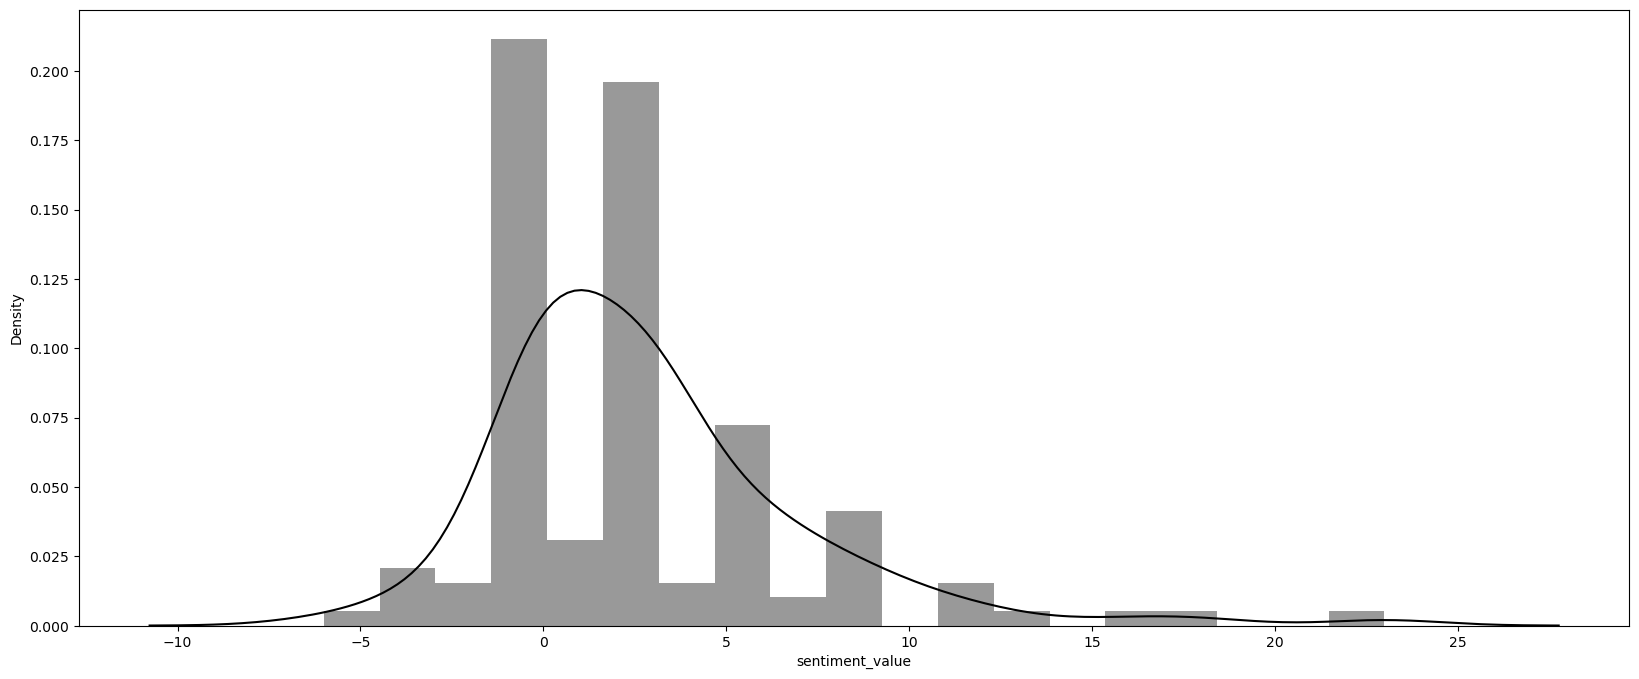

In [59]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize= (20,8))
sns.distplot(sent_df['sentiment_value'],color="black")

<Axes: xlabel='index', ylabel='sentiment_value'>

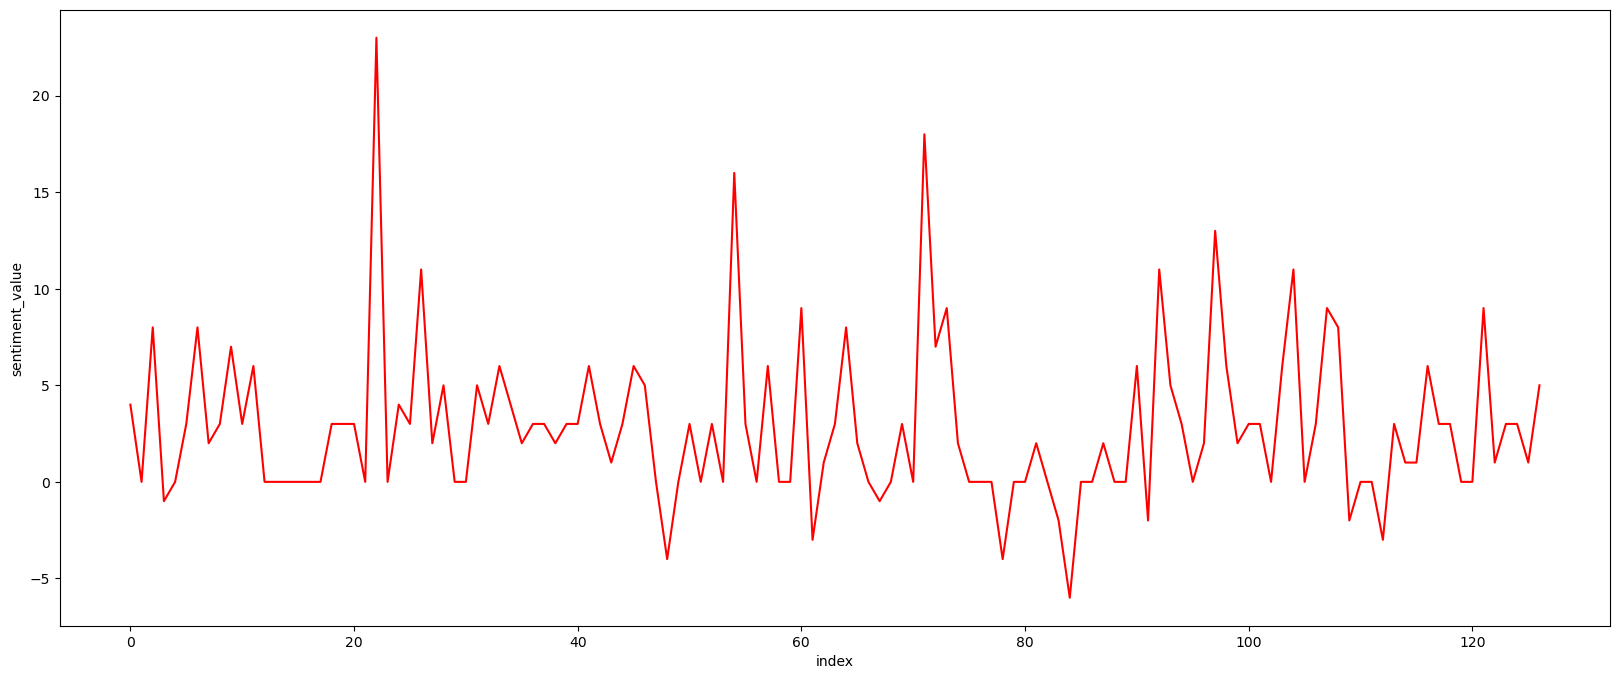

In [60]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize= (20,8))
sns.lineplot(y= 'sentiment_value',x= 'index',data= sent_df,color= 'red')

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

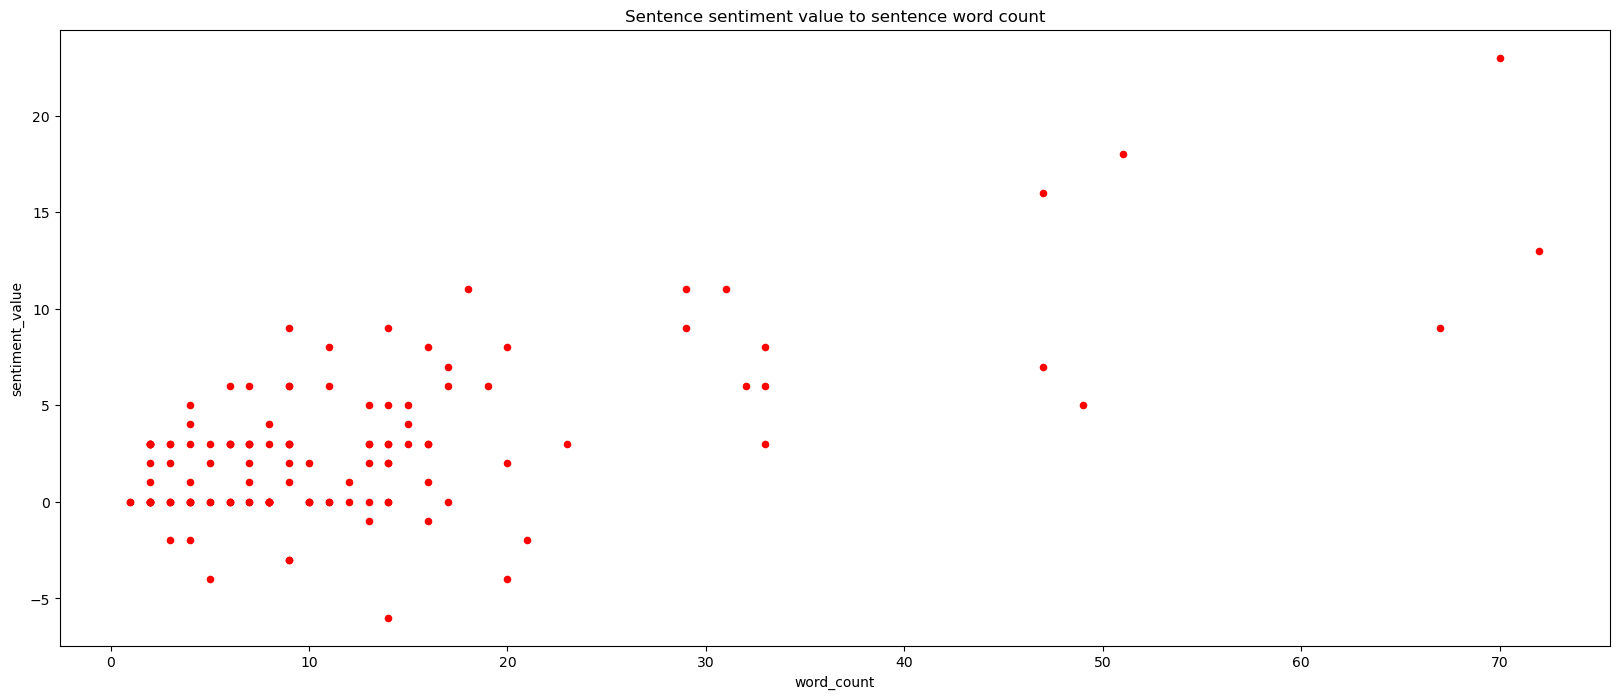

In [61]:
# Correlation analysis
sent_df.plot.scatter(x= 'word_count',y= 'sentiment_value',figsize=(20,8),title= 'Sentence sentiment value to sentence word count',color='red')